In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import accuracy_score
# all model use in machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

In [3]:
data=pd.read_csv("cancer_data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


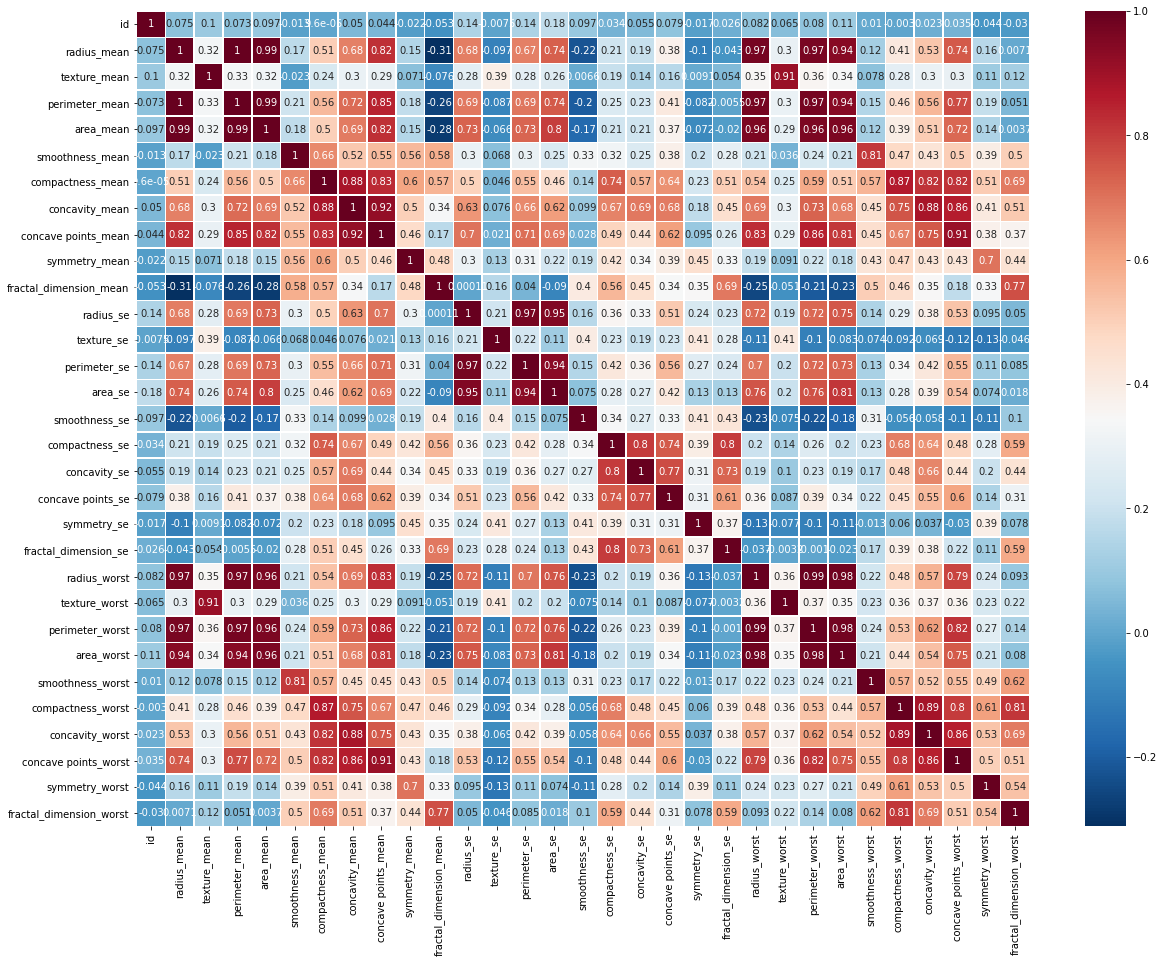

Diagnosis column:  ['M' 'B']


radius_mean                1.000000
perimeter_mean             0.997855
area_mean                  0.987357
radius_worst               0.969539
perimeter_worst            0.965137
area_worst                 0.941082
concave points_mean        0.822529
concave points_worst       0.744214
area_se                    0.735864
radius_se                  0.679090
concavity_mean             0.676764
perimeter_se               0.674172
concavity_worst            0.526911
compactness_mean           0.506124
compactness_worst          0.413463
concave points_se          0.376169
texture_mean               0.323782
texture_worst              0.297008
compactness_se             0.206000
concavity_se               0.194204
smoothness_mean            0.170581
symmetry_worst             0.163953
symmetry_mean              0.147741
smoothness_worst           0.119616
id                         0.074626
fractal_dimension_worst    0.007066
fractal_dimension_se      -0.0426

In [4]:
corr=data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()

print("Diagnosis column: ",data["diagnosis"].unique())
print("\n")
print(corr["radius_mean"].sort_values(ascending=False))

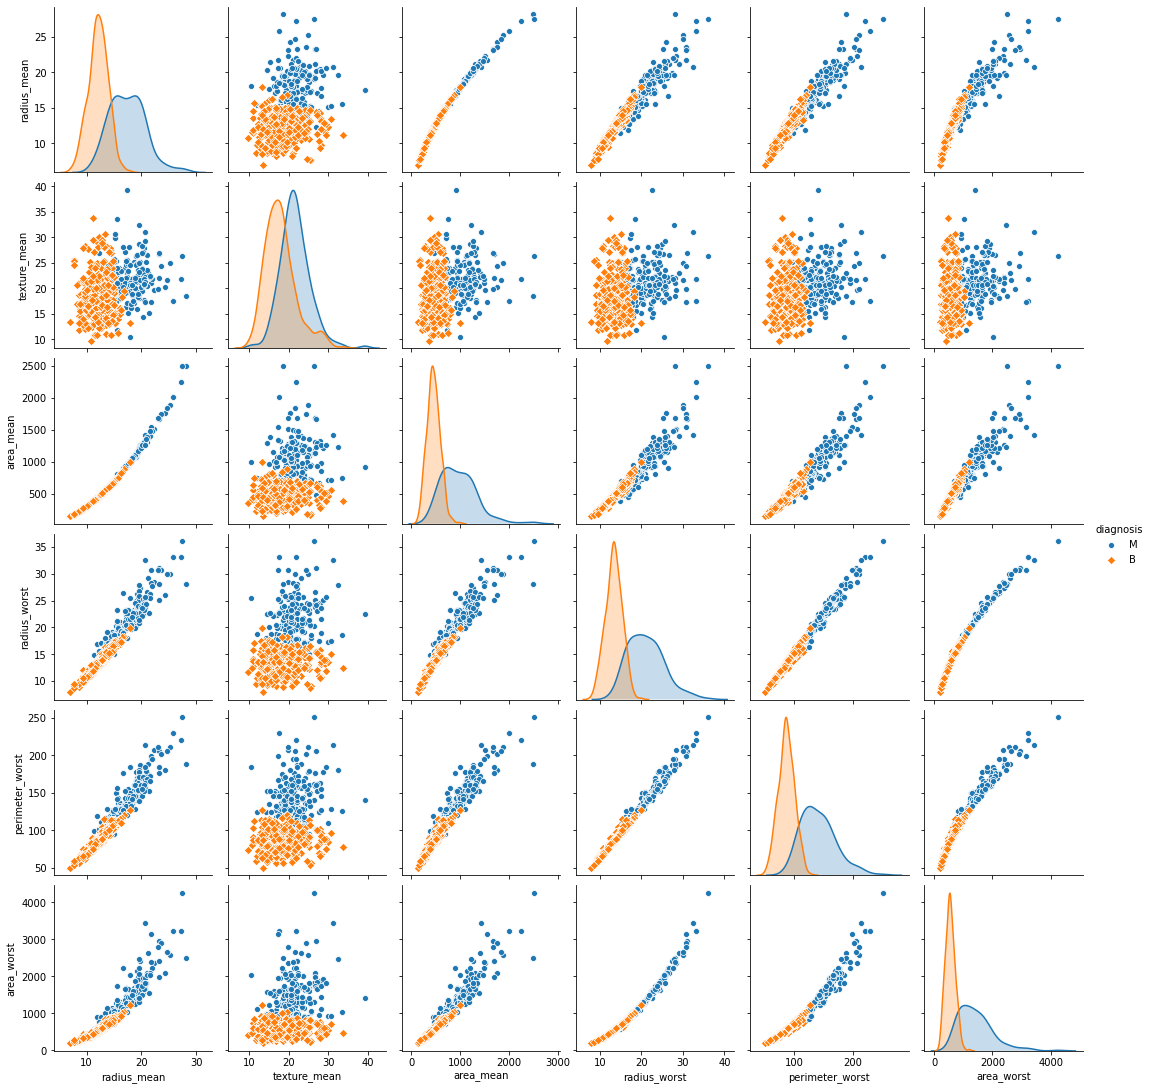

In [5]:
sns.pairplot(data,hue="diagnosis",vars=["radius_mean", "texture_mean","area_mean","radius_worst","perimeter_worst","area_worst" ]
            ,markers=["o", "D"])
plt.show()

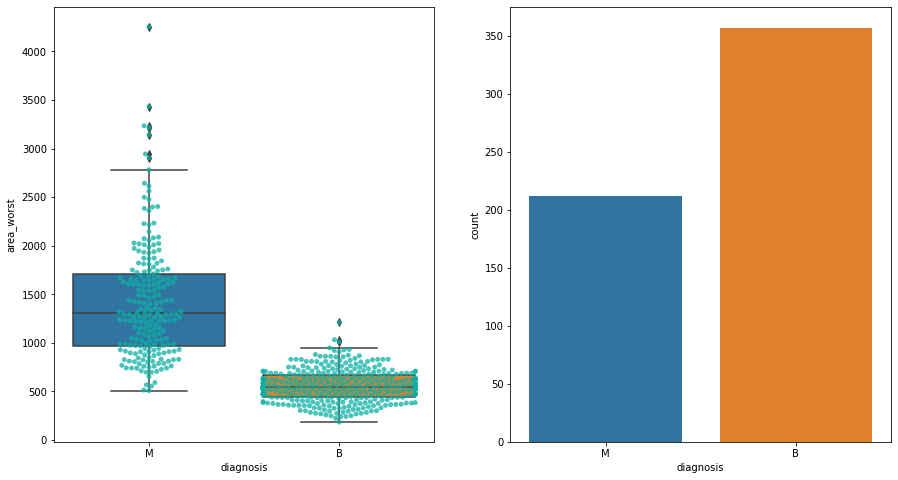

In [6]:
figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,8))

sns.boxplot(y="area_worst", x="diagnosis", data=data,ax=axes[0])
sns.swarmplot(y="area_worst", x="diagnosis", data=data,ax=axes[0],color='#0db0a5',alpha=0.75)
sns.countplot(data['diagnosis'],ax=axes[1])
plt.show()

<AxesSubplot:xlabel='radius_worst'>

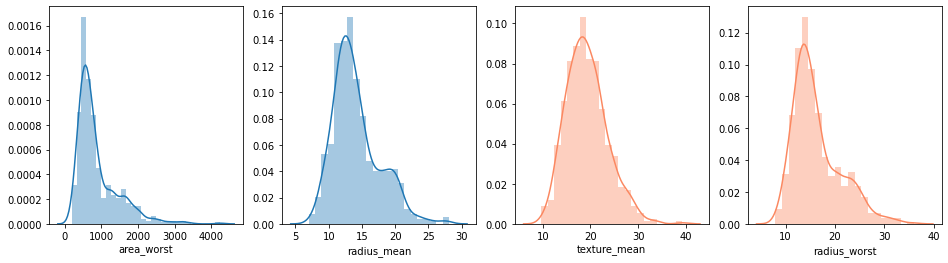

In [7]:
figure, axes = plt.subplots(nrows=1, ncols=4,figsize=(16,4))

sns.distplot(data['area_worst'],ax=axes[0])
sns.distplot(data['radius_mean'],ax=axes[1])
sns.distplot(data['texture_mean'],ax=axes[2],color='#FB8861')
sns.distplot(data['radius_worst'],ax=axes[3],color='#FB8861')

In [9]:
array=data.values # transform the data to array
X = array[:,2:(len(array)-1)] # all columns except id and values y
y = array[:,1] # diagnosis
#===============================
#let's train
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.15, random_state=1)
row=Y_train[Y_train=="M"].shape # the number of values "M" is 170
print("There have ",row, "values M in X_test ")

There have  (178,) values M in X_test 


LR 1: 0.952210 (0.044046)
LDA 1: 0.954545 (0.029568)
KNN 1: 0.927525 (0.029167)
CART 1: 0.937753 (0.041148)
NB 1: 0.939962 (0.031039)
SVM 1: 0.631439 (0.010704)


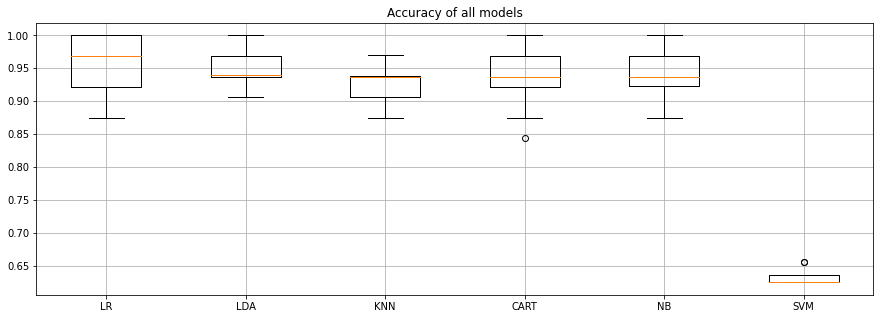

In [11]:
from sklearn.preprocessing import PolynomialFeatures # tạo hàm đa thức để check accurancy 
from sklearn.pipeline import Pipeline

def get_models(model,number):
    mode = dict()
    for d in range(1,number):
        # define the pipeline
        trans = PolynomialFeatures(degree=d)
        mode[str(d)] = Pipeline(steps=[('t', trans), ('m', model)])
        return mode

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=10, weights = 'distance')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn

results = []
names = []
for name, model in models:
    for username,new_model in get_models(model,2).items():
        kfold = StratifiedKFold(n_splits=15, random_state=1, shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print('%s %s: %f (%f)' % (name, username ,cv_results.mean(), cv_results.std()))
    
plt.figure(figsize=(15,5))
plt.grid(True)
plt.title("Accuracy of all models")
plt.boxplot(results,labels=names)
plt.show()

In [13]:
# we decide to choose LinearRegression-------
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear', multi_class='ovr')

model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
predictions

0.9534883720930233


array(['B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B'], dtype=object)

In [14]:
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
# 

[[52  0]
 [ 4 30]]
              precision    recall  f1-score   support

           B       0.93      1.00      0.96        52
           M       1.00      0.88      0.94        34

    accuracy                           0.95        86
   macro avg       0.96      0.94      0.95        86
weighted avg       0.96      0.95      0.95        86



,Diagnosis,area mean,Predict diagnosis
38,M,10.95,B
72,M,13.44,B
76,M,14.99,B
77,M,12.77,B


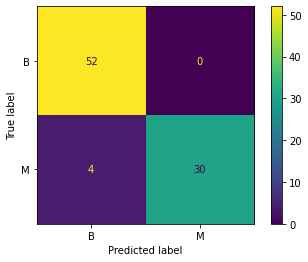

In [16]:
#we can see that 91% will be good model to predict profit
df = pd.DataFrame({'Diagnosis': Y_test, 'area mean': X_test[:,0],
                   'Predict diagnosis': predictions})
#row , column = df[df["Diagnosis"]!=df["Predict diagnosis"]].shape
#print("the number of predictions wrong about :",row)
#print("--------------------------------------------")
#print("the number of predictions true about : ",len(X_test)-row)
plot_confusion_matrix(model,X_test,Y_test)
print("\n")
df[df["Diagnosis"]!=df["Predict diagnosis"]]